# Halle's Exploratory Notebook

## 1. Data Importing and Pre-Processing

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import mode
import plotly.graph_objects as go
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn import tree

### Importing CSV Dataset from E-Commerce

In [2]:
d = pd.read_csv("../data/Employee.csv")

### Describing Data Shape

In [3]:
d.shape

(4653, 9)

### Taking a Peek at the Data

In [4]:
d.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [5]:
d.describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,4653,4653.000000,4653,4653.000000,4653.000000,4653,4653,4653.000000,4653.000000
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN
freq,3601,NaN,2228,NaN,NaN,2778,4175,NaN,NaN
mean,NaN,2015.062970,NaN,2.698259,29.393295,NaN,NaN,2.905652,0.343864
std,NaN,1.863377,NaN,0.561435,4.826087,NaN,NaN,1.558240,0.475047
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.000000
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,0.000000
50%,NaN,2015.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,0.000000
75%,NaN,2017.000000,NaN,3.000000,32.000000,NaN,NaN,4.000000,1.000000


In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


### Remove Duplicates

In [7]:
d = d.drop_duplicates()

In [8]:
d.shape #Re-running dimensions after removing duplicates

(2764, 9)

In [9]:
4653-2764

1889

We lost 1889 rows.

### Remove Nulls

In [10]:
d.isnull().sum() #Check number of nulls

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

No nulls.

### Reduce Redundant Data

In [11]:
d.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

I can't see any columns that we should drop before exploring their relationships.

### Update Data Types: Discretize/Recategorize

In [12]:
d.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

## 2. Data Analysis and Visualization

In [13]:
d.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

### Identify Variable Types

In [14]:
d.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

### Provide Measure of Centrality and Distribution with Visualizations

#### Joining Year

In [15]:
print("Mean")
print(d['JoiningYear'].mean())
print("Median")
print(d['JoiningYear'].median())
print("Mode")
print(mode(d['JoiningYear']).mode[0])
print("Standard Deviation")
print(d['JoiningYear'].std())

Mean
2015.090448625181
Median
2015.0
Mode
2017
Standard Deviation
1.8859431864163927


Text(0.5, 1.0, 'Number of Workers by Joining Year')

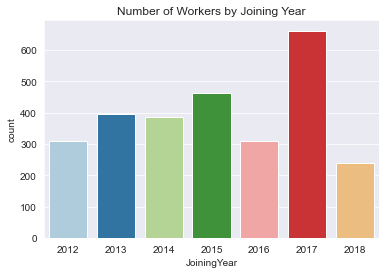

In [16]:
sns.countplot(x = d['JoiningYear'], palette = "Paired")
plt.title("Number of Workers by Joining Year")

#### PaymentTier

In [17]:
print("Mean")
print(d['PaymentTier'].mean())
print("Median")
print(d['PaymentTier'].median())
print("Mode")
print(mode(d['PaymentTier']).mode[0])
print("Standard Deviation")
print(d['PaymentTier'].std())

Mean
2.6360347322720696
Median
3.0
Mode
3
Standard Deviation
0.6240014652933755


Text(0.5, 1.0, 'Number of Workers by Payment Tier')

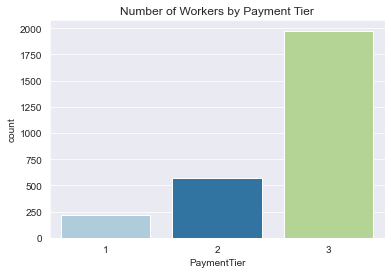

In [18]:
sns.countplot(x = d['PaymentTier'], palette = "Paired")
plt.title("Number of Workers by Payment Tier")

#Is 3 the highest or lowest payment tier?

#### Age

In [19]:
print("Mean")
print(d['Age'].mean())
print("Median")
print(d['Age'].median())
print("Mode")
print(mode(d['Age']).mode[0])
print("Standard Deviation")
print(d['Age'].std())

Mean
30.952966714905934
Median
30.0
Mode
28
Standard Deviation
5.108872076631115


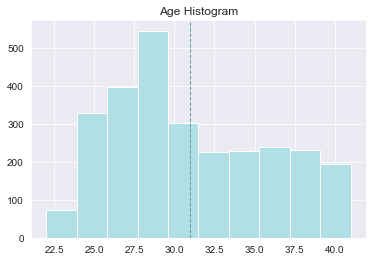

In [20]:
plt.hist(d['Age'], color = 'powderblue')
plt.axvline(d['Age'].mean(), color='cadetblue', linestyle='dashed', linewidth=1)
plt.title("Age Histogram")
plt.show() 

#### ExperienceInCurrentDomain

In [21]:
print("Mean")
print(d['ExperienceInCurrentDomain'].mean())
print("Median")
print(d['ExperienceInCurrentDomain'].median())
print("Mode")
print(mode(d['ExperienceInCurrentDomain']).mode[0])
print("Standard Deviation")
print(d['ExperienceInCurrentDomain'].std())

Mean
2.644356005788712
Median
2.0
Mode
2
Standard Deviation
1.6106101731390896


Text(0.5, 1.0, 'Number of Workers by Experience')

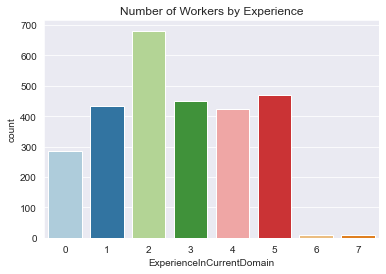

In [22]:
sns.countplot(x = d['ExperienceInCurrentDomain'], palette = "Paired")
plt.title("Number of Workers by Experience")

#### Education

In [23]:
print(mode(d['Education']).mode[0])

Bachelors


Text(0.5, 1.0, 'Number of Workers by Education Level')

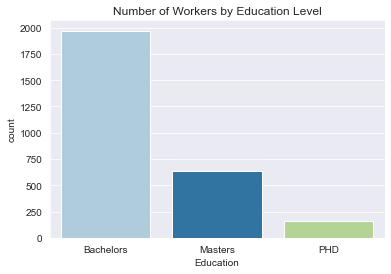

In [24]:
sns.countplot(x = d['Education'], palette = "Paired")
plt.title("Number of Workers by Education Level")

#### City

In [25]:
print(mode(d['City']).mode[0])

Bangalore


Text(0.5, 1.0, 'Number of Workers by City')

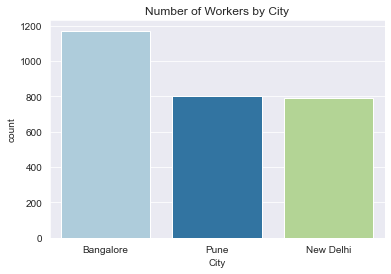

In [26]:
sns.countplot(x = d['City'], palette = "Paired")
plt.title("Number of Workers by City")

#### Gender

In [27]:
print(mode(d['Gender']).mode[0])

Male


Text(0.5, 1.0, 'Number of Workers by Gender')

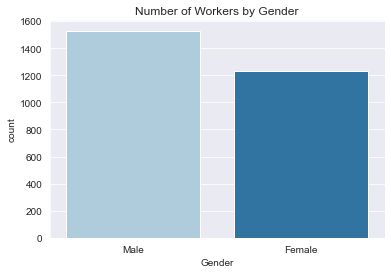

In [28]:
sns.countplot(x = d['Gender'], palette = "Paired")
plt.title("Number of Workers by Gender")

#### EverBenched

In [29]:
print(mode(d['EverBenched']).mode[0])

No


Text(0.5, 1.0, 'Number of Workers by Ever Benched')

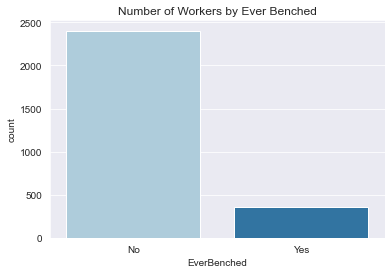

In [30]:
sns.countplot(x = d['EverBenched'], palette = "Paired")
plt.title("Number of Workers by Ever Benched")

#### LeaveorNot

In [31]:
print(mode(d['LeaveOrNot']).mode[0])

0


Text(0.5, 1.0, 'Number of Workers by LeaveOrNot')

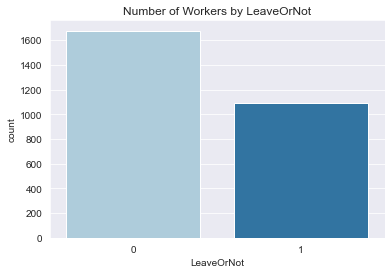

In [32]:
sns.countplot(x = d['LeaveOrNot'], palette = "Paired")
plt.title("Number of Workers by LeaveOrNot")

### Diagonse Correlation

#### Dependent variable is LeaveOrNot

In [33]:
d.groupby(by = "LeaveOrNot").mean()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain
LeaveOrNot,,,,
0,2014.861575,2.696301,31.426014,2.671838
1,2015.443015,2.543199,30.224265,2.602022


In [34]:
d.corr()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
JoiningYear,1.000000,-0.053823,0.024445,-0.031228,0.150650
PaymentTier,-0.053823,1.000000,0.067514,-0.004602,-0.119891
Age,0.024445,0.067514,1.000000,-0.053276,-0.114943
ExperienceInCurrentDomain,-0.031228,-0.004602,-0.053276,1.000000,-0.021181
LeaveOrNot,0.150650,-0.119891,-0.114943,-0.021181,1.000000


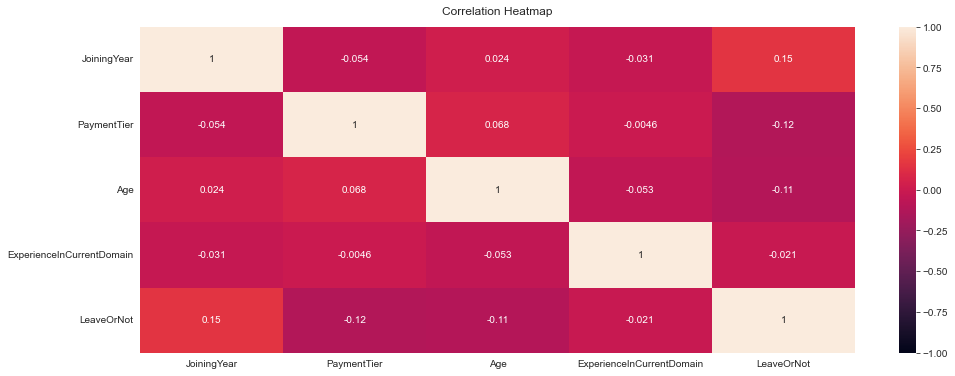

In [35]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(d.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#Nothing with a correlation of more than .5 generally or with our dependent variable
#Strongest relationship is between JoiningYear and LeaveOrNot

#### Education and LeaveOrNot

In [36]:
eduleave = pd.crosstab(d['Education'], d['LeaveOrNot'])
eduleave

LeaveOrNot,0,1
Education,,
Bachelors,1232,739
Masters,328,309
PHD,116,40


<AxesSubplot:title={'center':'Bar Chart of Education, Overlayed with LeaveOrNot'}, xlabel='Education'>

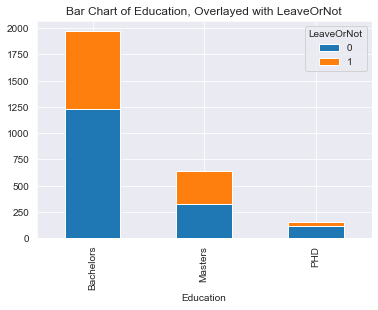

In [37]:
eduleave.plot(kind='bar', stacked = True, title = 'Bar Chart of Education, Overlayed with LeaveOrNot')

In [38]:
eduleave_n = eduleave.div(eduleave.sum(1), axis = 0)

<AxesSubplot:title={'center':'Normalized Bar Graph of Education, Overlayed with LeaveOrNot'}, xlabel='Education'>

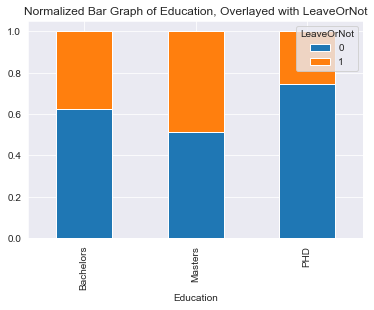

In [39]:
eduleave_n.plot(kind='bar', stacked=True, title = 'Normalized Bar Graph of Education, Overlayed with LeaveOrNot')

In [40]:
round(eduleave.div(eduleave.sum(0), axis = 1)*100, 1)

LeaveOrNot,0,1
Education,,
Bachelors,73.5,67.9
Masters,19.6,28.4
PHD,6.9,3.7


###### INSIGHT

Most of our folks have Bachelor's. People with Master's are more liekly to leave.

We can include in model, seems that this has an effect.

#### JoiningYear and LeaveOrNot

In [41]:
yearleave = pd.crosstab(d['JoiningYear'], d['LeaveOrNot'])
yearleave

LeaveOrNot,0,1
JoiningYear,,
2012,225,83
2013,225,171
2014,266,119
2015,272,192
2016,222,88
2017,461,201
2018,5,234


<AxesSubplot:title={'center':'Bar Chart of JoiningYear, Overlayed with LeaveOrNot'}, xlabel='JoiningYear'>

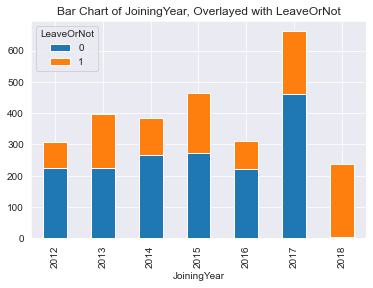

In [42]:
yearleave.plot(kind='bar', stacked = True, title = 'Bar Chart of JoiningYear, Overlayed with LeaveOrNot')

In [43]:
yearleave_n = yearleave.div(yearleave.sum(1), axis = 0)

<AxesSubplot:title={'center':'Normalized Bar Graph of Education, Overlayed with LeaveOrNot'}, xlabel='JoiningYear'>

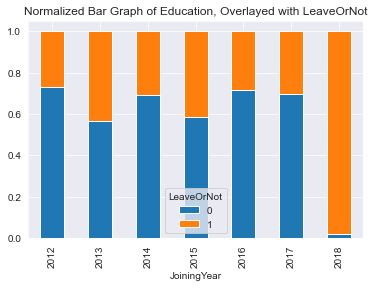

In [44]:
yearleave_n.plot(kind='bar', stacked=True, title = 'Normalized Bar Graph of Education, Overlayed with LeaveOrNot')

In [45]:
round(yearleave.div(yearleave.sum(0), axis = 1)*100, 1)

LeaveOrNot,0,1
JoiningYear,,
2012,13.4,7.6
2013,13.4,15.7
2014,15.9,10.9
2015,16.2,17.6
2016,13.2,8.1
2017,27.5,18.5
2018,0.3,21.5


##### INSIGHT

This has a correlation of .2 and it seems to have an erratic relationship, I think it's being pulled by the 2018 outliers. I would actually recommend we drop.

#### City and LeaveOrNot

In [46]:
cityleave = pd.crosstab(d['City'], d['LeaveOrNot'])
cityleave

LeaveOrNot,0,1
City,,
Bangalore,761,410
New Delhi,522,270
Pune,393,408


<AxesSubplot:title={'center':'Bar Chart of City, Overlayed with LeaveOrNot'}, xlabel='City'>

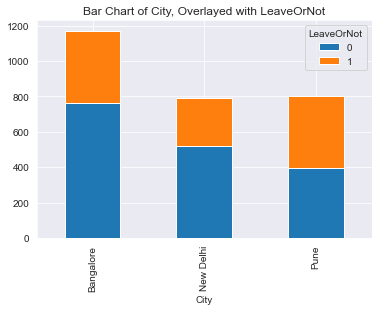

In [47]:
cityleave.plot(kind='bar', stacked = True, title = 'Bar Chart of City, Overlayed with LeaveOrNot')

In [48]:
cityleave_n = cityleave.div(cityleave.sum(1), axis = 0)

<AxesSubplot:title={'center':'Normalized Bar Graph of City, Overlayed with LeaveOrNot'}, xlabel='City'>

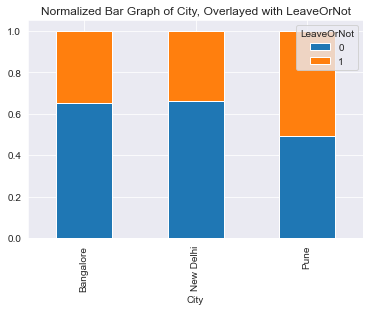

In [49]:
cityleave_n.plot(kind='bar', stacked=True, title = 'Normalized Bar Graph of City, Overlayed with LeaveOrNot')

In [50]:
round(cityleave.div(cityleave.sum(0), axis = 1)*100, 1)

LeaveOrNot,0,1
City,,
Bangalore,45.4,37.7
New Delhi,31.1,24.8
Pune,23.4,37.5


##### INSIGHT

This does seem to have an effect, let's include.

#### PaymentTier and LeaveOrNot

In [51]:
payleave = pd.crosstab(d['PaymentTier'], d['LeaveOrNot'])
payleave

LeaveOrNot,0,1
PaymentTier,,
1,141,77
2,227,343
3,1308,668


<AxesSubplot:title={'center':'Bar Chart of PaymentTier, Overlayed with LeaveOrNot'}, xlabel='PaymentTier'>

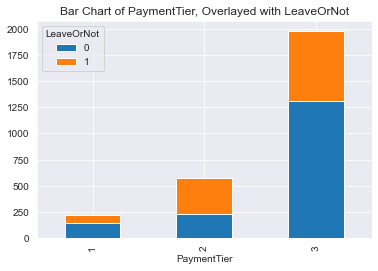

In [52]:
payleave.plot(kind='bar', stacked = True, title = 'Bar Chart of PaymentTier, Overlayed with LeaveOrNot')

In [53]:
payleave_n = payleave.div(payleave.sum(1), axis = 0)

<AxesSubplot:title={'center':'Normalized Bar Graph of PaymentTier, Overlayed with LeaveOrNot'}, xlabel='PaymentTier'>

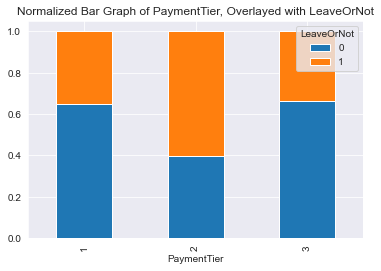

In [54]:
payleave_n.plot(kind='bar', stacked=True, title = 'Normalized Bar Graph of PaymentTier, Overlayed with LeaveOrNot')

In [55]:
round(payleave.div(payleave.sum(0), axis = 1)*100, 1)

LeaveOrNot,0,1
PaymentTier,,
1,8.4,7.1
2,13.5,31.5
3,78.0,61.4


##### INSIGHT

This does seem to have an effect, let's include.

#### Age and LeaveOrNot

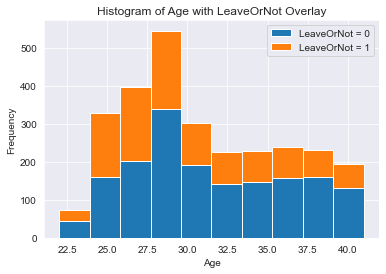

In [56]:
d_age_0 = d[d.LeaveOrNot == 0]['Age']
d_age_1 = d[d.LeaveOrNot == 1]['Age']
plt.hist([d_age_0, d_age_1], bins = 10, stacked = True)
plt.legend(['LeaveOrNot = 0','LeaveOrNot = 1'])
plt.title('Histogram of Age with LeaveOrNot Overlay')
plt.xlabel('Age'); plt.ylabel('Frequency'); plt.show()

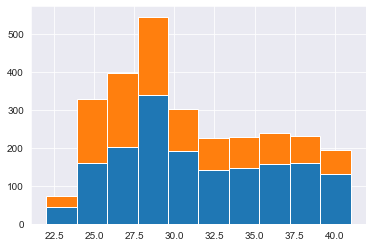

In [57]:
(n, bins, patches) = plt.hist([d_age_0, d_age_1], bins = 10, stacked = True)

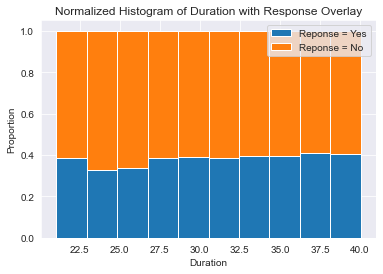

In [58]:
n_table = np.column_stack((n[0], n[1]))
n_norm = n_table / n_table.sum(axis=1) [:, None]
ourbins = np.column_stack((bins[0:10], bins[1:11]))
p1 = plt.bar(x=ourbins[:,0], height = n_norm[:,0], width = ourbins[:, 1]-ourbins[:,0])
p2 = plt.bar(x=ourbins[:,0], height = n_norm[:,1], width = ourbins[:, 1]-ourbins[:,0], bottom = n_norm[:,0])
plt.legend(['Reponse = Yes','Reponse = No'])
plt.title('Normalized Histogram of Duration with Response Overlay')
plt.xlabel('Duration'); plt.ylabel('Proportion'); plt.show()

##### INSIGHT

No affect. Do not include.

#### Gender and LeaveOrNot

In [59]:
genderleave = pd.crosstab(d['Gender'], d['LeaveOrNot'])
genderleave

LeaveOrNot,0,1
Gender,,
Female,621,614
Male,1055,474


<AxesSubplot:title={'center':'Bar Chart of Gender, Overlayed with LeaveOrNot'}, xlabel='Gender'>

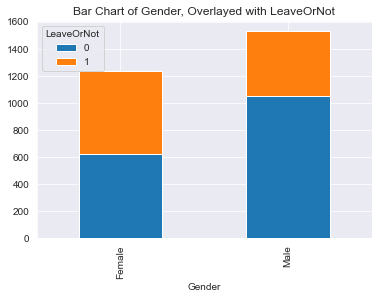

In [60]:
genderleave.plot(kind='bar', stacked = True, title = 'Bar Chart of Gender, Overlayed with LeaveOrNot')

In [61]:
genderleave_n = genderleave.div(genderleave.sum(1), axis = 0)

<AxesSubplot:title={'center':'Normalized Bar Graph of Gender, Overlayed with LeaveOrNot'}, xlabel='Gender'>

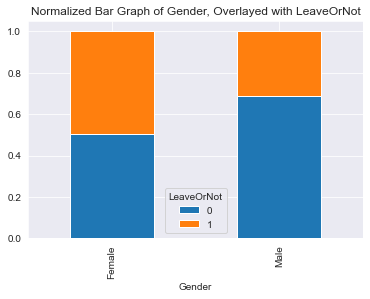

In [62]:
genderleave_n.plot(kind='bar', stacked=True, title = 'Normalized Bar Graph of Gender, Overlayed with LeaveOrNot')

In [63]:
round(genderleave.div(genderleave.sum(0), axis = 1)*100, 1)

LeaveOrNot,0,1
Gender,,
Female,37.1,56.4
Male,62.9,43.6


##### INSIGHT

This does seem to have an effect, let's include.

#### EverBenched and LeaveOrNot

In [64]:
benchleave = pd.crosstab(d['EverBenched'], d['LeaveOrNot'])
benchleave

LeaveOrNot,0,1
EverBenched,,
No,1474,929
Yes,202,159


<AxesSubplot:title={'center':'Bar Chart of EverBenched, Overlayed with LeaveOrNot'}, xlabel='EverBenched'>

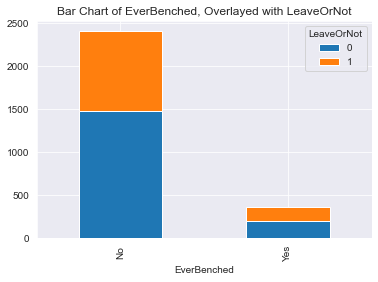

In [65]:
benchleave.plot(kind='bar', stacked = True, title = 'Bar Chart of EverBenched, Overlayed with LeaveOrNot')

In [66]:
benchleave_n = benchleave.div(benchleave.sum(1), axis = 0)

<AxesSubplot:title={'center':'Normalized Bar Graph of EverBenched, Overlayed with LeaveOrNot'}, xlabel='EverBenched'>

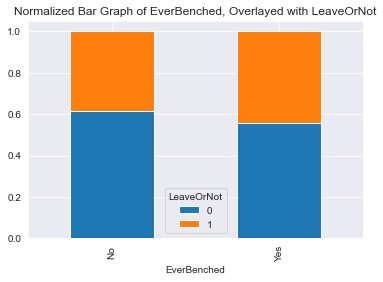

In [67]:
benchleave_n.plot(kind='bar', stacked=True, title = 'Normalized Bar Graph of EverBenched, Overlayed with LeaveOrNot')

In [68]:
round(benchleave.div(benchleave.sum(0), axis = 1)*100, 1)

LeaveOrNot,0,1
EverBenched,,
No,87.9,85.4
Yes,12.1,14.6


##### INSIGHT

This does seem to have an effect, let's include.

#### ExperienceinCurrentDomain and LeaveOrNot

In [69]:
expleave = pd.crosstab(d['ExperienceInCurrentDomain'], d['LeaveOrNot'])
expleave

LeaveOrNot,0,1
ExperienceInCurrentDomain,,
0,178,109
1,273,160
2,390,291
3,255,196
4,258,167
5,310,160
6,6,2
7,6,3


<AxesSubplot:title={'center':'Bar Chart of ExperienceInCurrentDomain, Overlayed with LeaveOrNot'}, xlabel='ExperienceInCurrentDomain'>

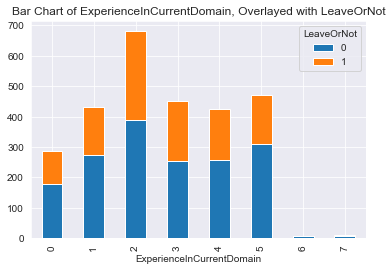

In [70]:
expleave.plot(kind='bar', stacked = True, title = 'Bar Chart of ExperienceInCurrentDomain, Overlayed with LeaveOrNot')

In [71]:
expleave_n = expleave.div(expleave.sum(1), axis = 0)

<AxesSubplot:title={'center':'Normalized Bar Graph of ExperienceInCurrentDomain, Overlayed with LeaveOrNot'}, xlabel='ExperienceInCurrentDomain'>

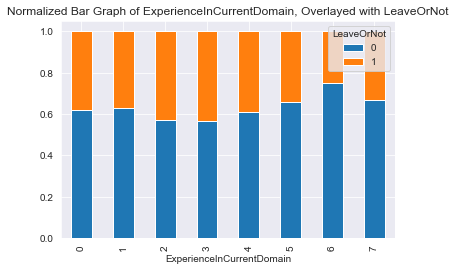

In [72]:
expleave_n.plot(kind='bar', stacked=True, title = 'Normalized Bar Graph of ExperienceInCurrentDomain, Overlayed with LeaveOrNot')

In [73]:
round(expleave.div(expleave.sum(0), axis = 1)*100, 1)

LeaveOrNot,0,1
ExperienceInCurrentDomain,,
0,10.6,10.0
1,16.3,14.7
2,23.3,26.7
3,15.2,18.0
4,15.4,15.3
5,18.5,14.7
6,0.4,0.2
7,0.4,0.3


##### INSIGHT

Let's combine into ranges and see if there's more of an effect.

In [74]:
exprange = {0: '0-1', 1: '0-1', 2: '2-3', 3: '2-3', 4: '4-5', 5: '4-5', 6: '6-7', 7: '6-7'}
 
d['ExpYearRange'] = d['ExperienceInCurrentDomain'].map(exprange)

In [75]:
exprleave = pd.crosstab(d['ExpYearRange'], d['LeaveOrNot'])
exprleave

LeaveOrNot,0,1
ExpYearRange,,
0-1,451,269
2-3,645,487
4-5,568,327
6-7,12,5


In [76]:
round(exprleave.div(exprleave.sum(0), axis = 1)*100, 1)

LeaveOrNot,0,1
ExpYearRange,,
0-1,26.9,24.7
2-3,38.5,44.8
4-5,33.9,30.1
6-7,0.7,0.5


##### INSIGHT

To include or not include?